## **WEB PROJECT**
* This project aims to scrape data from [Scrape quotes](https://quotes.toscrape.com/), a free public website designed for scraping.
* We will use various libraries such as `requests` , `bs4`, `pandas` in this project.

### OVERVIEW
* We will visit the website and inspect the elements of the HTML DOM tree.
* After identifying the targeted element, we will get all content and parse it as a string.
* We will save scraped data using `list` and `dictionary`.
* We will format and tabularize the scaraped data using `pandas`.
* We wil also write the scraped data to a file as csv or excel.

***
***
***

## `requests`
* This library is used to reques the HTML DOM.


In [2]:
# It is used to request html page to work with
import requests
url = "https://quotes.toscrape.com/"

In [3]:
# This fetches all the content of HTML page as a HTML DOM tree
html = requests.get(url).content

In [4]:
# The fetched content is in byte-stream [b], we need it as a string
html

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n\t<meta charset="UTF-8">\n\t<title>Quotes to Scrape</title>\n    <link rel="stylesheet" href="/static/bootstrap.min.css">\n    <link rel="stylesheet" href="/static/main.css">\n</head>\n<body>\n    <div class="container">\n        <div class="row header-box">\n            <div class="col-md-8">\n                <h1>\n                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>\n                </h1>\n            </div>\n            <div class="col-md-4">\n                <p>\n                \n                    <a href="/login">Login</a>\n                \n                </p>\n            </div>\n        </div>\n    \n\n<div class="row">\n    <div class="col-md-8">\n\n    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">\n        <span class="text" itemprop="text">\xe2\x80\x9cThe world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.\xe2\x80\

***
***
***

## `bs4`
* The fetched data is in byte string, which is difficult to work with.
* This library/file has a `BeautifulSoup` class that helps convert the byte stream `b` to string.
* This helps create a proper HTML DOM tree structure, which increases readability and searchability.

In [6]:
# import BeautifulSoup class
from bs4 import BeautifulSoup

In [7]:
# parser helps convert the byte stream[b] to readable string, which is in DOM tree structure
html_tree = BeautifulSoup(html,"html.parser")

In [8]:
html_tree

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Quotes to Scrape</title>
<link href="/static/bootstrap.min.css" rel="stylesheet"/>
<link href="/static/main.css" rel="stylesheet"/>
</head>
<body>
<div class="container">
<div class="row header-box">
<div class="col-md-8">
<h1>
<a href="/" style="text-decoration: none">Quotes to Scrape</a>
</h1>
</div>
<div class="col-md-4">
<p>
<a href="/login">Login</a>
</p>
</div>
</div>
<div class="row">
<div class="col-md-8">
<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="

***
***
***

## Searching for targeted class of HTML (class="text" that has all the quotes)

* We are looking for a class that has quotes,. Here class = "text" has all the quotes.

``` html
<span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
```



In [9]:
# Searching through DOM document for "text" class using find_all() method, where className is passed as an argument.
# NOTE:: class is reserved keyword in python, so class_ is used insteasd for HTML.
html_tree.find_all(class_ = "text")

[<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>,
 <span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>,
 <span class="text" itemprop="text">“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”</span>,
 <span class="text" itemprop="text">“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”</span>,
 <span class="text" itemprop="text">“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”</span>,
 <span class="text" itemprop="text">“Try not to become a man of success. Rather become a man of value.”</span>,
 <span class="text" itemprop="text">“It is better to be hated for what you are than to be loved for what you are not.

In [10]:
# saving the quotes which is a LIST in a new variable
quote_html = html_tree.find_all(class_ = "text")

In [12]:
# accessing element of the LIST through index
quote_html[0]

<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>

In [13]:
# HTML texts elements are accessed using ".text".
quote_html[0].text

'“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”'

In [14]:
# Using list comoprehension and looping through each item of the List and saving as a new LIST of only quotes, without HTML eelements
quotes = [item.text for item in quote_html]

In [42]:
# printing the variable that contains all the list
quotes

['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”',
 '“It is our choices, Harry, that show what we truly are, far more than our abilities.”',
 '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”',
 '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”',
 "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”",
 '“Try not to become a man of success. Rather become a man of value.”',
 '“It is better to be hated for what you are than to be loved for what you are not.”',
 "“I have not failed. I've just found 10,000 ways that won't work.”",
 "“A woman is like a tea bag; you never know how strong it is until it's in hot water.”",
 '“A day without sunshine is like, you know, night.”']

***
***
***


## Searching for targeted class of HTML (class="author" that has all the author name)
* We are looking for a class that has author names,. Here class = "author" has all the names.


``` html
<span>by <small class="author" itemprop="author">J.K. Rowling</small>
<a href="/author/J-K-Rowling">(about)</a>
</span>
```



In [16]:
# Searching through DOM document for "author" class using find_all() method, where className is passed as an argument.
# NOTE:: class is reserved keyword in python, so class_ is used insteasd for HTML.
author_html = html_tree.find_all(class_ = "author")

In [17]:
# LIST of authors
author_html

[<small class="author" itemprop="author">Albert Einstein</small>,
 <small class="author" itemprop="author">J.K. Rowling</small>,
 <small class="author" itemprop="author">Albert Einstein</small>,
 <small class="author" itemprop="author">Jane Austen</small>,
 <small class="author" itemprop="author">Marilyn Monroe</small>,
 <small class="author" itemprop="author">Albert Einstein</small>,
 <small class="author" itemprop="author">André Gide</small>,
 <small class="author" itemprop="author">Thomas A. Edison</small>,
 <small class="author" itemprop="author">Eleanor Roosevelt</small>,
 <small class="author" itemprop="author">Steve Martin</small>]

In [18]:
# Using list comoprehension and looping through each item of the List and saving as a new LIST of only author names, without HTML eelements
author = [item.text for item in author_html]

In [19]:
# printing the list that contains all the author names
author

['Albert Einstein',
 'J.K. Rowling',
 'Albert Einstein',
 'Jane Austen',
 'Marilyn Monroe',
 'Albert Einstein',
 'André Gide',
 'Thomas A. Edison',
 'Eleanor Roosevelt',
 'Steve Martin']

***
***
***

## Data binding
* Using python `dictionary` to bind "quotes" and "author" as a single unit.
* This dictionary will later be used with `pandas` for further manipulation.

In [20]:
data = {
    "quote":quotes,
    "author":author
}

In [21]:
data

{'quote': ['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”',
  '“It is our choices, Harry, that show what we truly are, far more than our abilities.”',
  '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”',
  '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”',
  "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”",
  '“Try not to become a man of success. Rather become a man of value.”',
  '“It is better to be hated for what you are than to be loved for what you are not.”',
  "“I have not failed. I've just found 10,000 ways that won't work.”",
  "“A woman is like a tea bag; you never know how strong it is until it's in hot water.”",
  '“A day without sunshine is like, you know, night.”'],
 'author': ['Albert Einstein',
  'J

***
***
***

## `pandas` library

In [22]:
# importing pandas
import pandas as pd

---

## Coverting Dictionary to Table
---

In [23]:
# Using DataFrame function, and passing dictionary "data" as a parameter to the function
# Dataframe convets dictionary to the table
df = pd.DataFrame(data)

In [24]:
# printing DataFrame
df

,quote,author
0,“The world as we have created it is a process ...,Albert Einstein
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling
2,“There are only two ways to live your life. On...,Albert Einstein
3,"“The person, be it gentleman or lady, who has ...",Jane Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe
5,“Try not to become a man of success. Rather be...,Albert Einstein
6,“It is better to be hated for what you are tha...,André Gide
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison
8,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt
9,"“A day without sunshine is like, you know, nig...",Steve Martin


***
## Writing tabular data to csv file
***

In [25]:
df.to_csv("data.csv")

***
## Writing tabular data to excel file
***

In [26]:
df.to_excel("data.xlsx")

***
## HEAD reads first 5 data
***

In [27]:
df.head()

,quote,author
0,“The world as we have created it is a process ...,Albert Einstein
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling
2,“There are only two ways to live your life. On...,Albert Einstein
3,"“The person, be it gentleman or lady, who has ...",Jane Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe


***
## TAIL reads last 5 data
***

In [28]:
df.tail()

,quote,author
5,“Try not to become a man of success. Rather be...,Albert Einstein
6,“It is better to be hated for what you are tha...,André Gide
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison
8,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt
9,"“A day without sunshine is like, you know, nig...",Steve Martin


***
## Accessing only certain type of data
* Here we will access only author from the table
***

In [29]:
# direct access using dot operator
df.author

0      Albert Einstein
1         J.K. Rowling
2      Albert Einstein
3          Jane Austen
4       Marilyn Monroe
5      Albert Einstein
6           André Gide
7     Thomas A. Edison
8    Eleanor Roosevelt
9         Steve Martin
Name: author, dtype: object

In [31]:
# accessing using as a dictionary
df["author"]

0      Albert Einstein
1         J.K. Rowling
2      Albert Einstein
3          Jane Austen
4       Marilyn Monroe
5      Albert Einstein
6           André Gide
7     Thomas A. Edison
8    Eleanor Roosevelt
9         Steve Martin
Name: author, dtype: object

In [32]:
# Accessing quote
df.quote

0    “The world as we have created it is a process ...
1    “It is our choices, Harry, that show what we t...
2    “There are only two ways to live your life. On...
3    “The person, be it gentleman or lady, who has ...
4    “Imperfection is beauty, madness is genius and...
5    “Try not to become a man of success. Rather be...
6    “It is better to be hated for what you are tha...
7    “I have not failed. I've just found 10,000 way...
8    “A woman is like a tea bag; you never know how...
9    “A day without sunshine is like, you know, nig...
Name: quote, dtype: object

***
## Printing unique item from the author
***

In [33]:
df.author.unique()

array(['Albert Einstein', 'J.K. Rowling', 'Jane Austen', 'Marilyn Monroe',
       'André Gide', 'Thomas A. Edison', 'Eleanor Roosevelt',
       'Steve Martin'], dtype=object)

***
## Printing unique number of items from the author
***

In [37]:
df.author.nunique()

8

***
## Printing count of occurence of each number of items from the author
***

In [39]:
df.author.value_counts()

author
Albert Einstein      3
J.K. Rowling         1
Jane Austen          1
Marilyn Monroe       1
André Gide           1
Thomas A. Edison     1
Eleanor Roosevelt    1
Steve Martin         1
Name: count, dtype: int64

***
## Plotting the above data as a  bar
***

<Axes: xlabel='author'>

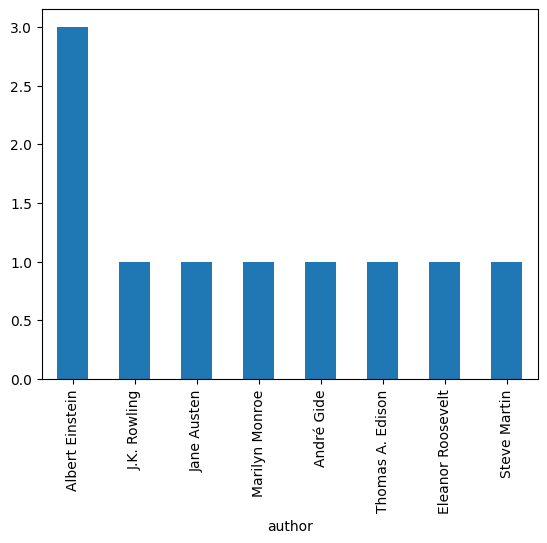

In [40]:
df.author.value_counts().plot.bar()

***
## Plotting the above data as a pie chart
***

<Axes: ylabel='count'>

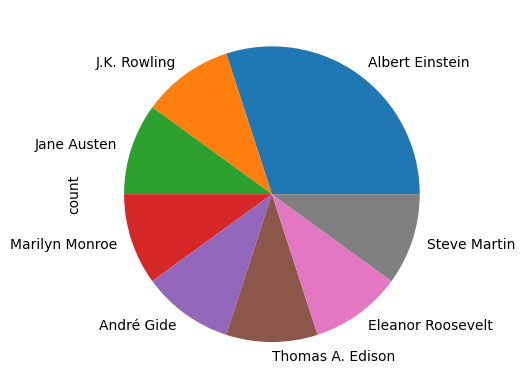

In [41]:
df.author.value_counts().plot.pie()